In [48]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm


#normalising the input data 
def compute_mean_std(dataloader):
    mean = 0.0
    std = 0.0
    total_samples = 0

    for images, _ in dataloader:
        batch_samples = images.size(0)  
        images = images.view(batch_samples, 3, -1)
        mean += images.mean(dim=[0, 2]) * batch_samples
        std += images.std(dim=[0, 2]) * batch_samples
        total_samples += batch_samples

    mean /= total_samples
    std /= total_samples
    return mean.tolist(), std.tolist()

# loading CIFAR 10 dataset
compute_transform = transforms.Compose([transforms.ToTensor()])
compute_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=compute_transform)
compute_loader = torch.utils.data.DataLoader(compute_dataset, batch_size=10000, shuffle=False)


mean, std = compute_mean_std(compute_loader)
print(f"Computed Mean: {mean}")
print(f"Computed Std: {std}")


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)  
])


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)


Files already downloaded and verified
Computed Mean: [0.49139946699142456, 0.4821587800979614, 0.4465312957763672]
Computed Std: [0.24702714383602142, 0.2434811145067215, 0.2615843415260315]
Files already downloaded and verified


In [49]:

#confirming that only test set is downloaded
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])  
])


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

print(f"Test set size: {len(testset)} images")  


Test set size: 10000 images


In [50]:
testloader

Files already downloaded and verified


/var/folders/29/458ydd_j11q4vpw8md8c37fh0000gn/T/ipykernel_91293/3013168880.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/Users/jae

Class Labels in CIFAR-10:
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


100%|██████████| 100/100 [01:55<00:00,  1.15s/it]
/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b


Trained Model Accuracy: 0.6754
Untrained Model Accuracy: 0.1082

Trained Model Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56      1000
           1       0.79      0.85      0.82      1000
           2       0.60      0.64      0.62      1000
           3       0.39      0.63      0.48      1000
           4       0.63      0.65      0.64      1000
           5       0.70      0.57      0.63      1000
           6       0.83      0.67      0.74      1000
           7       0.88      0.70      0.78      1000
           8       0.80      0.75      0.78      1000
           9       0.72      0.81      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000


Untrained Model Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.

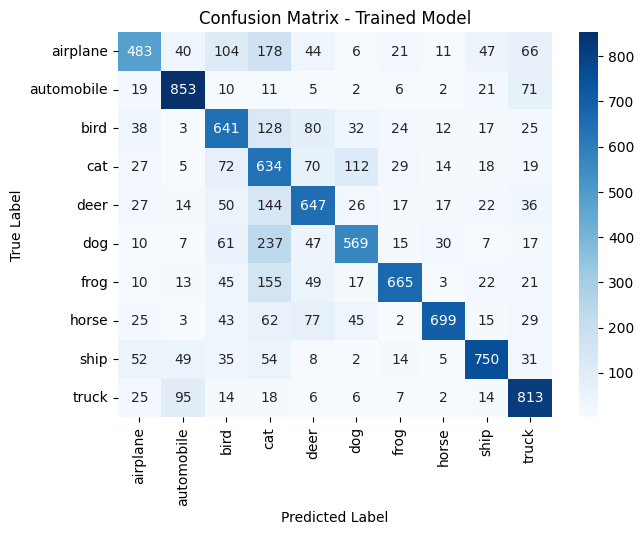

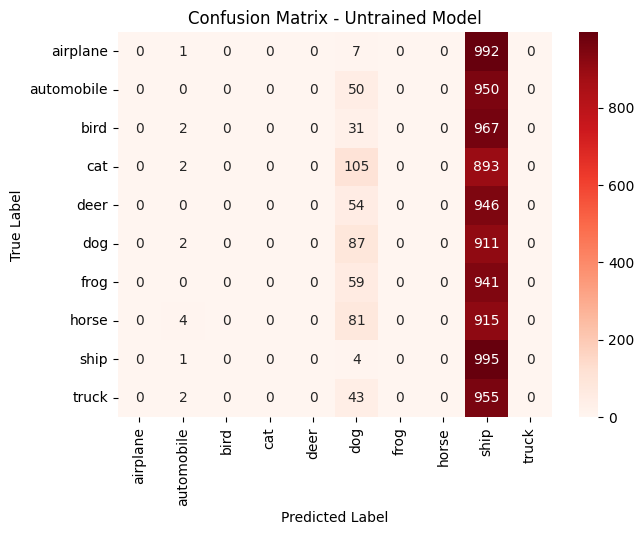

In [52]:

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# set Device as CPU
device = torch.device("cpu")

# load CIFAR-10 Test Set
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2470, 0.2435, 0.2616])  # CIFAR-10 Mean & Std
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)


print("Class Labels in CIFAR-10:")
print(testset.classes)  #retrieve class labels

#loading model from network.py
from network import SmallAlexNet  

model = SmallAlexNet().to(device)
model.load_state_dict(torch.load("/Users/jaeeponde/trustworthy_ai/model_weight.pt", map_location=device)) 
model.eval()  

# initialise untraied model
untrained_model = SmallAlexNet().to(device)
untrained_model.eval()


def evaluate_model(model, testloader):
    y_true, y_pred = [], []

    with torch.no_grad():
        for images, labels in tqdm(testloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return y_true, y_pred


y_true_trained, y_pred_trained = evaluate_model(model, testloader)
y_true_untrained, y_pred_untrained = evaluate_model(untrained_model, testloader)

accuracy_trained = accuracy_score(y_true_trained, y_pred_trained)
accuracy_untrained = accuracy_score(y_true_untrained, y_pred_untrained)

print(f"\nTrained Model Accuracy: {accuracy_trained:.4f}")
print(f"Untrained Model Accuracy: {accuracy_untrained:.4f}")

# Compute Classification Report
print("\nTrained Model Classification Report:\n", classification_report(y_true_trained, y_pred_trained))
print("\nUntrained Model Classification Report:\n", classification_report(y_true_untrained, y_pred_untrained))

# Compute Confusion Matrices
cm_trained = confusion_matrix(y_true_trained, y_pred_trained)
cm_untrained = confusion_matrix(y_true_untrained, y_pred_untrained)

# Plot Confusion Matrix for Trained Model
plt.figure(figsize=(7, 5))
sns.heatmap(cm_trained, annot=True, fmt='d', cmap='Blues', xticklabels=testset.classes, yticklabels=testset.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Trained Model")
plt.show()

# Plot Confusion Matrix for Untrained Model
plt.figure(figsize=(7, 5))
sns.heatmap(cm_untrained, annot=True, fmt='d', cmap='Reds', xticklabels=testset.classes, yticklabels=testset.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Untrained Model")
plt.show()


/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jaeeponde/anaconda3/envs/kcdha/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

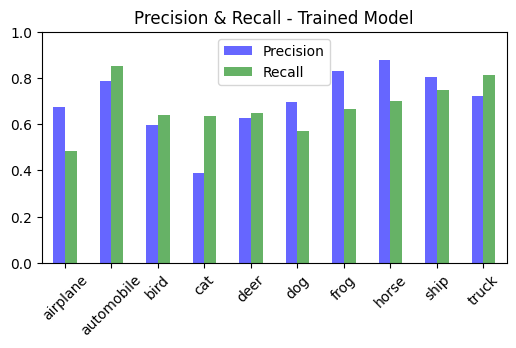

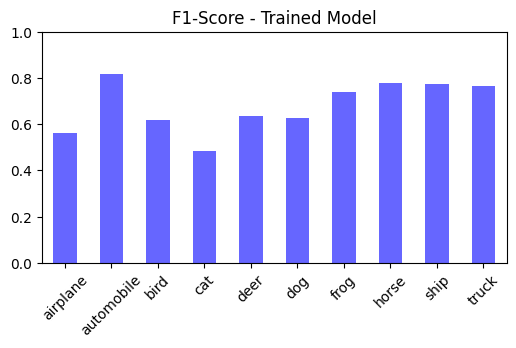

In [64]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import pandas as pd


device = torch.device("cpu")

# fefine class names manually
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]  
num_classes = len(class_names)



report_trained = classification_report(y_true_trained, y_pred_trained, target_names=class_names, output_dict=True)
report_untrained = classification_report(y_true_untrained, y_pred_untrained, target_names=class_names, output_dict=True)


df_trained = pd.DataFrame(report_trained).transpose().loc[class_names, ["precision", "recall", "f1-score"]]
df_untrained = pd.DataFrame(report_untrained).transpose().loc[class_names, ["precision", "recall", "f1-score"]]

plt.figure(figsize=(6, 3))
df_trained[["precision", "recall"]].plot(kind="bar", color=["blue", "green"], alpha=0.6, ax=plt.gca())
plt.title("Precision & Recall - Trained Model")
plt.xticks(ticks=range(num_classes), labels=class_names, rotation=45)
plt.ylim(0, 1)
plt.legend(["Precision", "Recall"])
plt.show()


plt.figure(figsize=(6, 3))
df_trained["f1-score"].plot(kind="bar", color="blue", alpha=0.6, ax=plt.gca())
plt.title("F1-Score - Trained Model")
plt.xticks(ticks=range(num_classes), labels=class_names, rotation=45)
plt.ylim(0, 1)
plt.show()



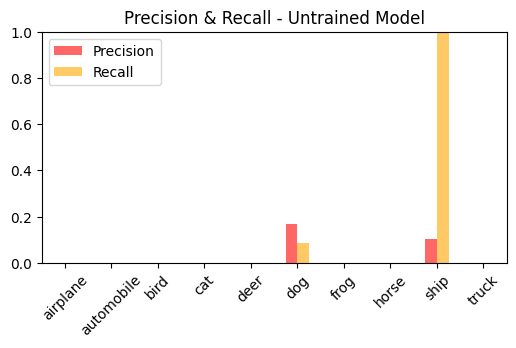

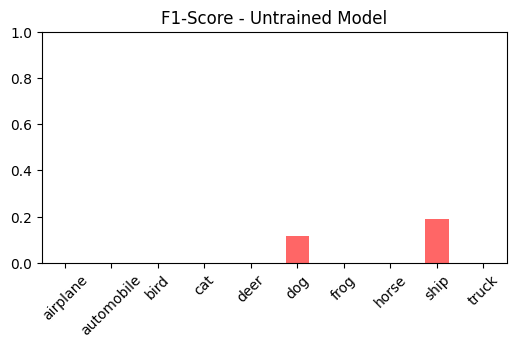

In [66]:
#do the same for untrained model 

plt.figure(figsize=(6, 3))
df_untrained[["precision", "recall"]].plot(kind="bar", color=["red", "orange"], alpha=0.6, ax=plt.gca())
plt.title("Precision & Recall - Untrained Model")
plt.xticks(ticks=range(num_classes), labels=class_names, rotation=45)
plt.ylim(0, 1)
plt.legend(["Precision", "Recall"])
plt.show()


plt.figure(figsize=(6, 3))
df_untrained["f1-score"].plot(kind="bar", color="red", alpha=0.6, ax=plt.gca())
plt.title("F1-Score - Untrained Model")
plt.xticks(ticks=range(num_classes), labels=class_names, rotation=45)
plt.ylim(0, 1)
plt.show()



100%|██████████| 100/100 [01:51<00:00,  1.12s/it]


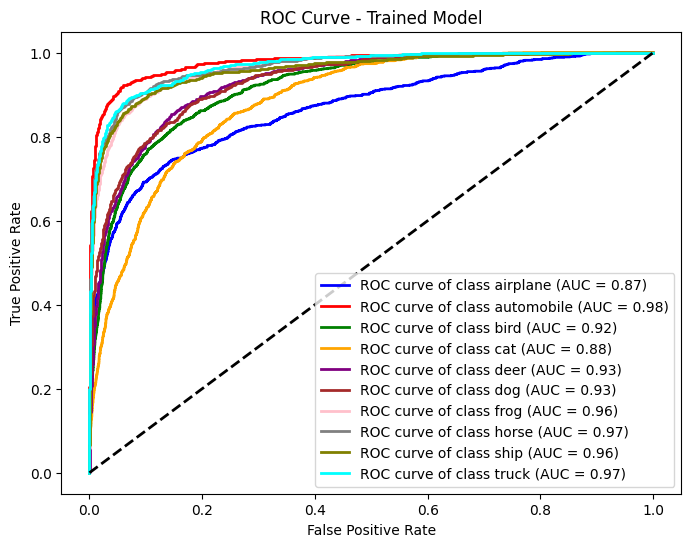

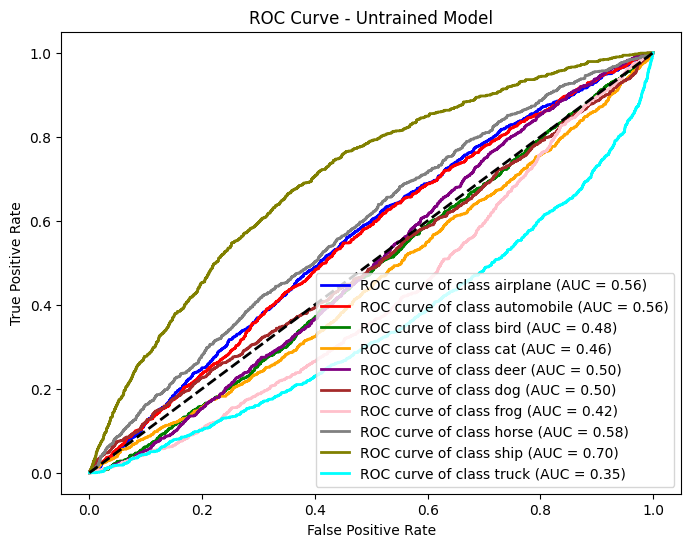

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle


n_classes = len(testset.classes)
y_true_trained_bin = label_binarize(y_true_trained, classes=range(n_classes))
y_true_untrained_bin = label_binarize(y_true_untrained, classes=range(n_classes))


def compute_roc_auc(model, testloader, n_classes):
    y_true_bin = []
    y_scores = []

    with torch.no_grad():
        for images, labels in tqdm(testloader):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = torch.nn.functional.softmax(outputs, dim=1)
            y_true_bin.extend(label_binarize(labels.cpu().numpy(), classes=range(n_classes)))
            y_scores.extend(probabilities.cpu().numpy())

    y_true_bin = np.array(y_true_bin)
    y_scores = np.array(y_scores)

 
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    return fpr, tpr, roc_auc


fpr_trained, tpr_trained, roc_auc_trained = compute_roc_auc(model, testloader, n_classes)
fpr_untrained, tpr_untrained, roc_auc_untrained = compute_roc_auc(untrained_model, testloader, n_classes)


plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_trained[i], tpr_trained[i], color=color, lw=2,
             label=f'ROC curve of class {testset.classes[i]} (AUC = {roc_auc_trained[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Trained Model')
plt.legend(loc="lower right")
plt.show()


plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_untrained[i], tpr_untrained[i], color=color, lw=2,
             label=f'ROC curve of class {testset.classes[i]} (AUC = {roc_auc_untrained[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Untrained Model')
plt.legend(loc="lower right")
plt.show()

import kagglehub

# Download latest version
path = kagglehub.dataset_download("akash2sharma/tiny-imagenet")

print("Path to dataset files:", path)

In [76]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("akash2sharma/tiny-imagenet")

print("Path to dataset files:", path)

Resuming download from 6291456 bytes (491245108 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/akash2sharma/tiny-imagenet?dataset_version_number=1 (6291456/497536564) bytes left.


100%|██████████| 474M/474M [01:14<00:00, 6.57MB/s] 

Extracting files...


Path to dataset files: /Users/jaeeponde/.cache/kagglehub/datasets/akash2sharma/tiny-imagenet/versions/1


/var/folders/29/458ydd_j11q4vpw8md8c37fh0000gn/T/ipykernel_99045/3985494539.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("/Users/jae

Model Accuracy on TinyImageNet CIFAR-10: 0.0717


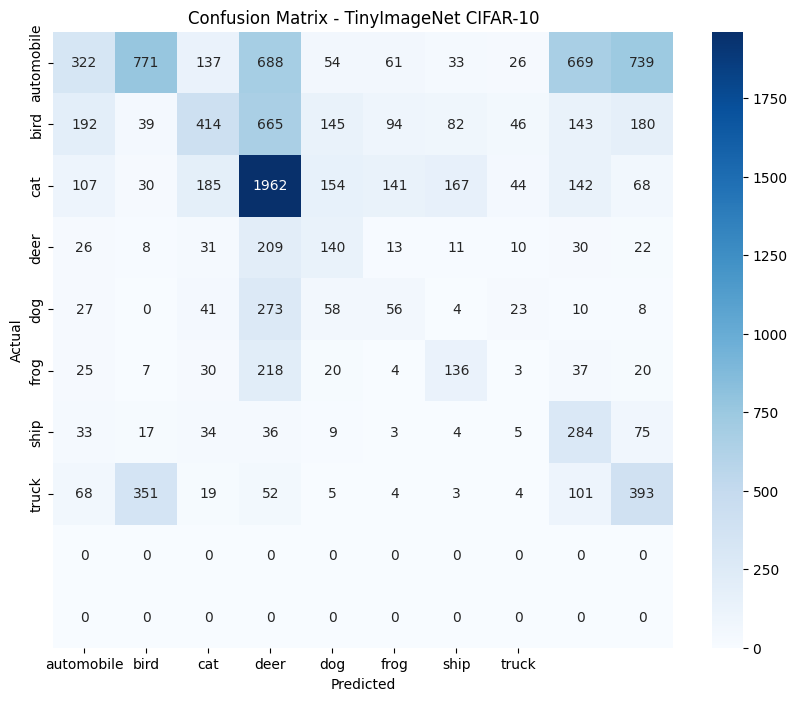

In [3]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from network import SmallAlexNet


transform = transforms.Compose([
    transforms.Resize((32, 32)),  
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])


dataset_path = "/Users/jaeeponde/trustworthy_ai/tinyimagenet_cifar10" 
testset = datasets.ImageFolder(root=dataset_path, transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SmallAlexNet()  
model.load_state_dict(torch.load("/Users/jaeeponde/trustworthy_ai/model_weight.pt", map_location=device))
model.to(device)
model.eval()


y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predictions.cpu().numpy())

accuracy = accuracy_score(y_true, y_pred)
print(f"Model Accuracy on TinyImageNet CIFAR-10: {accuracy:.4f}")


class_names = testset.classes  
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - TinyImageNet CIFAR-10")
plt.show()
